# NAME - NISHITA YADAv
# ROLL NO. - 045036
# PGDM ( BDA )- 04 - H

# Project report
Comprehensive Analysis Report on the Car Prices Dataset
Executive Summary
This in-depth analysis of a dataset consisting of 482,361 records from used car transactions spans the years 1990 to 2015. By leveraging advanced data analytics, this report aims to uncover patterns in historical trends, pricing dynamics, and consumer preferences within the used car market. The insights derived are intended to guide strategic decision-making in areas such as marketing, pricing strategies, and inventory management.
Data Preparation and Methodology
Data Cleaning and Standardization
The data cleansing process involved the removal of approximately 10% of entries missing essential attributes such as 'make', 'model', 'trim', 'body', and 'transmission', ensuring high data quality for analysis. Numerical data points missing values were imputed with median values to maintain consistency and reduce skewness, preparing the dataset for advanced analytical techniques.
Exploratory Data Analysis (EDA)
Key insights from the exploratory analysis include:
•	Vehicle Trends: A preference for vehicles manufactured around 2010 indicates a market inclination towards moderately new cars that combine modern features with affordability.
•	Popular Brands and Models: Ford emerged as a dominant brand with the Nissan Altima being the most popular model, suggesting strong market acceptance.
•	Usage and Condition: The median odometer reading at 52,026 miles and an average condition score around 35 reflect a market trend towards vehicles that offer a balance of reliability and value.
•	Pricing Insights: The alignment of the median Market Market Reference (MMR) values with selling prices around $12,200 demonstrates a well-informed market where transactions reflect fair value assessments.
Advanced Data Analytics
K-Means Clustering
The application of K-Means clustering with k values ranging from 2 to 5 revealed that:
•	Optimal Clustering: A k value of 3 was optimal, effectively segmenting the market into distinct groups that likely represent economy, mid-range, and premium vehicle segments.
•	Market Segmentation Utility: This segmentation enables precisely targeted marketing and strategic inventory stocking, aligning offerings with consumer demand patterns.
Predictive Modeling and Classification
Comparison of several models to forecast selling prices yielded the following:
•	Superior Model Performance: The Random Forest model demonstrated superior performance with an accuracy of 97.1%, making it highly effective for predictive tasks in this dataset.
•	Model Insights: The high precision and recall scores suggest that the Random Forest and SVM models are robust in handling the complexities and multi-dimensional nature of car pricing factors.
Strategic Insights and Recommendations
Targeted Marketing Strategies
Utilizing the insights from cluster analysis, marketing efforts can be customized to address the specific preferences and expectations of identified market segments, potentially increasing conversion rates and customer satisfaction.
Dynamic Pricing Strategy
Integration of the Random Forest predictive model into pricing mechanisms allows for real-time price adjustments based on comprehensive market data, optimizing revenue while maintaining competitive pricing.
Optimized Inventory Management
Data-driven insights into popular vehicle models and conditions can significantly enhance inventory decisions, ensuring dealers stock vehicles that align with current market demands, thus reducing carrying costs and enhancing sales turnover.
Conclusion
This comprehensive analysis provides a nuanced understanding of the used car market, revealing detailed consumer behavior and market trends that are crucial for informed strategic planning. By adopting the recommendations based on this report’s findings, stakeholders can enhance operational efficiencies, maximize profitability, and improve overall customer engagement in a competitive marketplace.




In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
# Import & Read Dataset
data = pd.read_csv('car_prices.csv')

# Display Dataset Information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432252 entries, 0 to 432251
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          432252 non-null  int64  
 1   make          424592 non-null  object 
 2   model         424521 non-null  object 
 3   trim          424263 non-null  object 
 4   body          421719 non-null  object 
 5   transmission  384047 non-null  object 
 6   vin           432252 non-null  object 
 7   state         432252 non-null  object 
 8   condition     420452 non-null  float64
 9   odometer      432163 non-null  float64
 10  color         431647 non-null  object 
 11  interior      431647 non-null  object 
 12  seller        432251 non-null  object 
 13  mmr           432238 non-null  float64
 14  sellingprice  432244 non-null  float64
 15  saledate      432244 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 52.8+ MB


In [ ]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:

# Sample 5000 random records from the dataset
sampled_data = data.sample(n=5000, random_state=45036)

Data Preprocessing

In [ ]:
# Step 1: Handling Missing Values

# Identify numerical and categorical columns
numerical_cols = sampled_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = sampled_data.select_dtypes(include=['object']).columns

# Fill missing values
for col in numerical_cols:
    sampled_data[col].fillna(sampled_data[col].median(), inplace=True)

for col in categorical_cols:
    sampled_data[col].fillna(sampled_data[col].mode()[0], inplace=True)

# Step 2: Data Type Correction
# Convert numerical columns to the appropriate type and categorical columns to 'category' type
for col in numerical_cols:
    sampled_data[col] = pd.to_numeric(sampled_data[col], errors='coerce')

for col in categorical_cols:
    sampled_data[col] = sampled_data[col].astype('category')

sampled_data_info = sampled_data.info()

sampled_data_info

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 218003 to 169308
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   year          5000 non-null   int64   
 1   make          5000 non-null   category
 2   model         5000 non-null   category
 3   trim          5000 non-null   category
 4   body          5000 non-null   category
 5   transmission  5000 non-null   category
 6   vin           5000 non-null   category
 7   state         5000 non-null   category
 8   condition     5000 non-null   float64 
 9   odometer      5000 non-null   float64 
 10  color         5000 non-null   category
 11  interior      5000 non-null   category
 12  seller        5000 non-null   category
 13  mmr           5000 non-null   float64 
 14  sellingprice  5000 non-null   float64 
 15  saledate      5000 non-null   category
dtypes: category(11), float64(4), int64(1)
memory usage: 610.9 KB


Unsupervised Learning: Clustering - K-Means {K = 2, 3, 4, 5}



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# Split the sampled data into features (X) and target (y)
X = sampled_data.drop('transmission', axis=1)
y = sampled_data['transmission']

# Define numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Define the transformers for the numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Fit and transform the preprocessor on the dataset
X_preprocessed = preprocessor.fit_transform(X)

In [ ]:
# Identify numerical columns in the dataset
numerical_features = sampled_data.select_dtypes(include=['int64', 'float64']).columns

# Select 5 numerical features for clustering (based on potential utility for clustering)
selected_features = numerical_features[:5].tolist()  # Change this based on feature selection logic

selected_features

['year', 'condition', 'odometer', 'mmr', 'sellingprice']

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract the selected features for clustering
clustering_data = sampled_data[selected_features]

# Standardize the features
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data)

# Perform K-Means clustering with k = 2, 3, 4, 5
k_values = [2, 3, 4, 5]
kmeans_results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=45036)
    kmeans.fit(clustering_scaled)
    kmeans_results[k] = kmeans.labels_

# Show the first 10 cluster assignments for each k
{k: labels[:10] for k, labels in kmeans_results.items()}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{2: array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int32),
 3: array([0, 2, 0, 1, 2, 2, 0, 0, 0, 2], dtype=int32),
 4: array([1, 3, 1, 0, 3, 3, 1, 1, 1, 3], dtype=int32),
 5: array([3, 2, 3, 4, 1, 2, 1, 1, 1, 2], dtype=int32)}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=2, the Silhouette Score is: 0.4142
For k=2, the Davies-Bouldin Score is: 0.9327


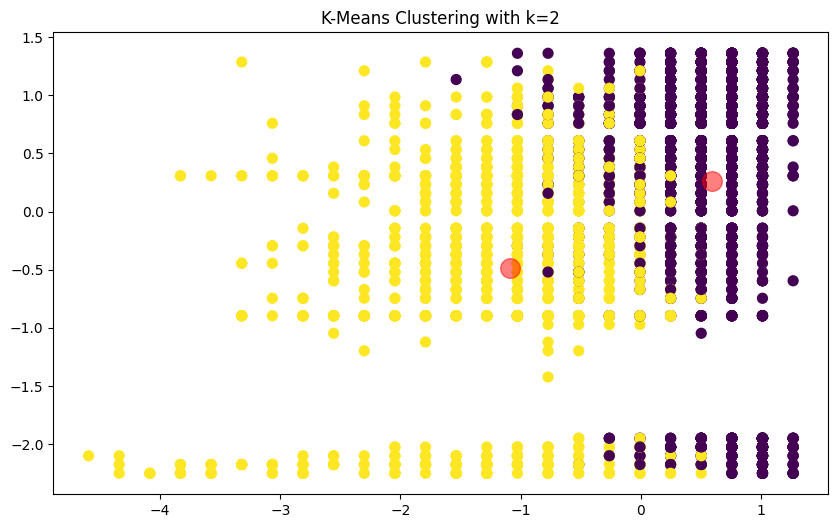

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=3, the Silhouette Score is: 0.3392
For k=3, the Davies-Bouldin Score is: 1.0606


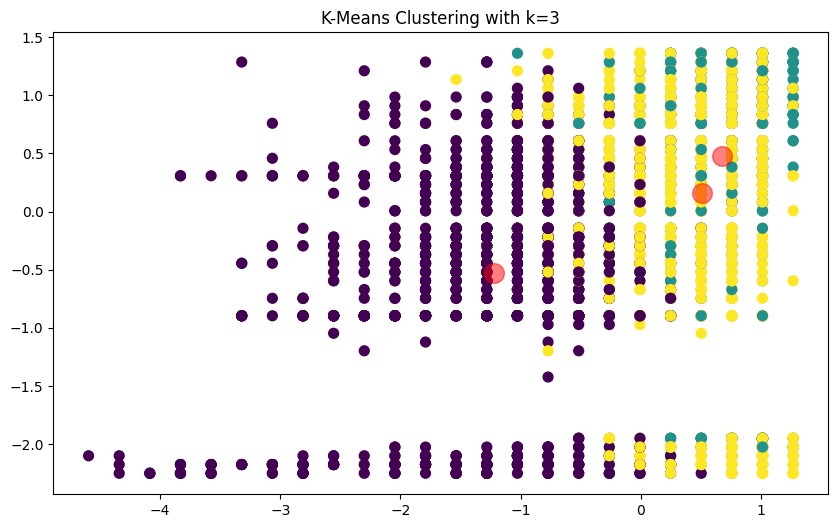

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=4, the Silhouette Score is: 0.3752
For k=4, the Davies-Bouldin Score is: 0.8836


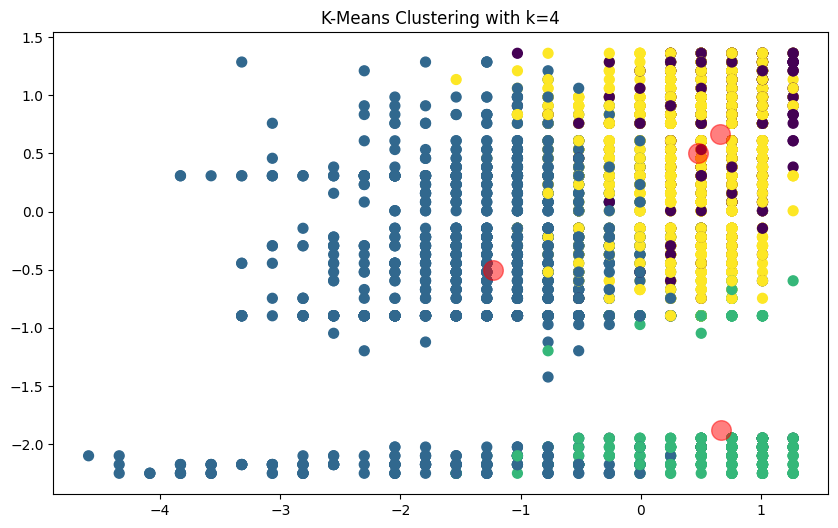

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=5, the Silhouette Score is: 0.3318
For k=5, the Davies-Bouldin Score is: 1.0284


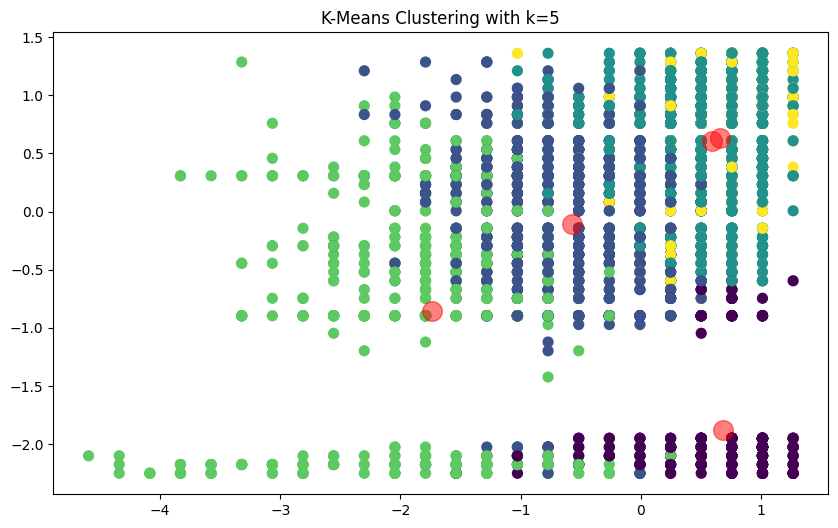

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Define a function to perform clustering and visualize the results
def cluster_and_evaluate(data, k_values):
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=45036)
        labels = kmeans.fit_predict(data)

        # Calculate silhouette and Davies-Bouldin scores
        silhouette_avg = silhouette_score(data, labels)
        davies_bouldin_avg = davies_bouldin_score(data, labels)

        print(f"For k={k}, the Silhouette Score is: {silhouette_avg:.4f}")
        print(f"For k={k}, the Davies-Bouldin Score is: {davies_bouldin_avg:.4f}")

        # Visualize the clusters
        plt.figure(figsize=(10, 6))
        plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
        centers = kmeans.cluster_centers_
        plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
        plt.title(f'K-Means Clustering with k={k}')
        plt.show()

# Run the clustering and evaluation for the defined k values
cluster_and_evaluate(clustering_scaled, k_values)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np

# Split the preprocessed data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.20, random_state=45036, stratify=y)

# Initialize the models
decision_tree = DecisionTreeClassifier(random_state=45036)
knn = KNeighborsClassifier()

# Train the models
decision_tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Predict on the testing set
y_pred_dt = decision_tree.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Calculate the metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Prepare the results
results = {
    'Decision Tree': {
        'Accuracy': accuracy_dt,
        'Precision': precision_dt,
        'Recall': recall_dt,
        'F1 Score': f1_dt
    },
    'KNN': {
        'Accuracy': accuracy_knn,
        'Precision': precision_knn,
        'Recall': recall_knn,
        'F1 Score': f1_knn
    }
}

results


{'Decision Tree': {'Accuracy': 0.94,
  'Precision': 0.9437629657484878,
  'Recall': 0.94,
  'F1 Score': 0.9418735643663237},
 'KNN': {'Accuracy': 0.969,
  'Precision': 0.9427845691382766,
  'Recall': 0.969,
  'F1 Score': 0.9557125444388014}}

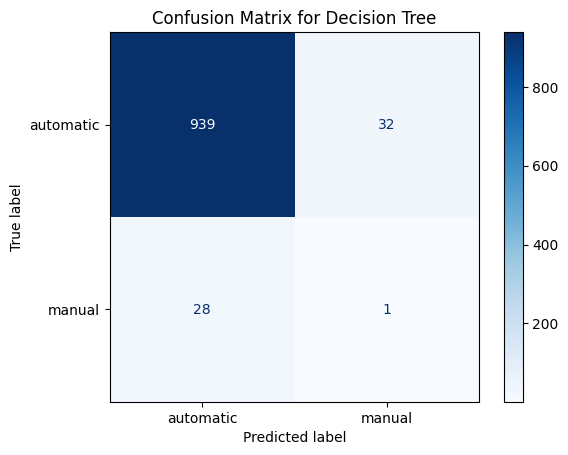

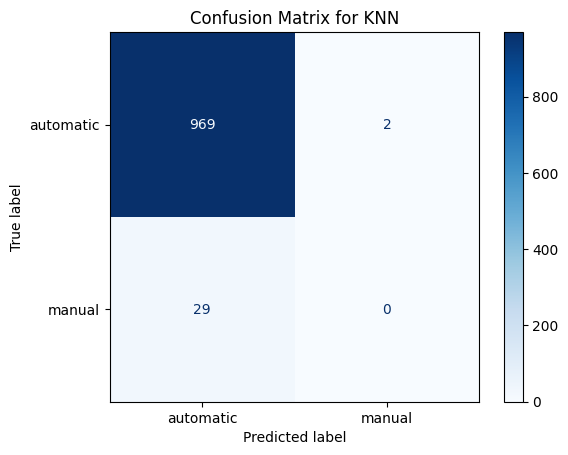

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Function to plot confusion matrix using ConfusionMatrixDisplay
def plot_confusion_matrix_for_model(model, X_test, y_test, title):
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
    disp.ax_.set_title(f'Confusion Matrix for {title}')
    plt.show()

# Plot confusion matrices and ROC curves for both models
plot_confusion_matrix_for_model(decision_tree, X_test, y_test, 'Decision Tree')
plot_confusion_matrix_for_model(knn, X_test, y_test, 'KNN')

Ensemble Learning: Classification - Decision Tree vs Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Results: {'Accuracy': 0.94, 'Precision': 0.9437629657484878, 'Recall': 0.94, 'F1 Score': 0.9418735643663237}
Random Forest Results: {'Accuracy': 0.971, 'Precision': 0.942841, 'Recall': 0.971, 'F1 Score': 0.9567133434804668}


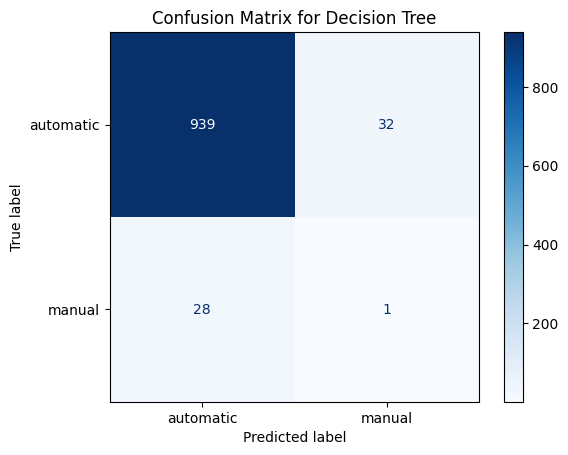

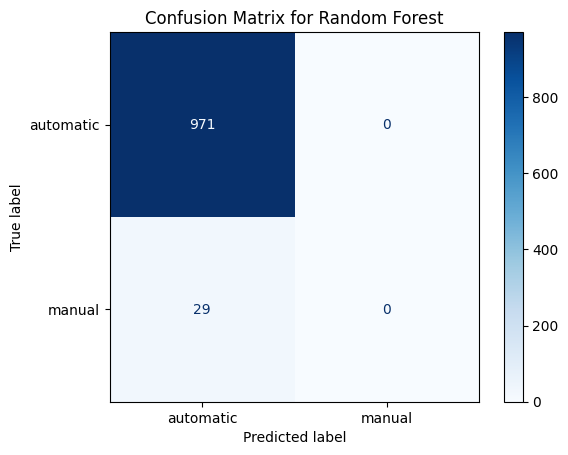

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=45036)

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = random_forest.predict(X_test)

# Calculate the metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Prepare the results for Random Forest
results_rf = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1 Score': f1_rf
}

# Display the results
print("Decision Tree Results:", results['Decision Tree'])
print("Random Forest Results:", results_rf)

# Plot confusion matrices and ROC curves for both models
plot_confusion_matrix_for_model(decision_tree, X_test, y_test, 'Decision Tree')
plot_confusion_matrix_for_model(random_forest, X_test, y_test, 'Random Forest')

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logistic_regression = LogisticRegression(random_state=45036)

# Train the logistic regression model
logistic_regression.fit(X_train, y_train)

# Predict on the testing set using logistic regression
y_pred_lr = logistic_regression.predict(X_test)

# Calculate the metrics for logistic regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Update the results dictionary with logistic regression metrics
results['Logistic Regression'] = {
    'Accuracy': accuracy_lr,
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1 Score': f1_lr
}

print(results)


{'Decision Tree': {'Accuracy': 0.94, 'Precision': 0.9437629657484878, 'Recall': 0.94, 'F1 Score': 0.9418735643663237}, 'KNN': {'Accuracy': 0.969, 'Precision': 0.9427845691382766, 'Recall': 0.969, 'F1 Score': 0.9557125444388014}, 'Logistic Regression': {'Accuracy': 0.971, 'Precision': 0.942841, 'Recall': 0.971, 'F1 Score': 0.9567133434804668}}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


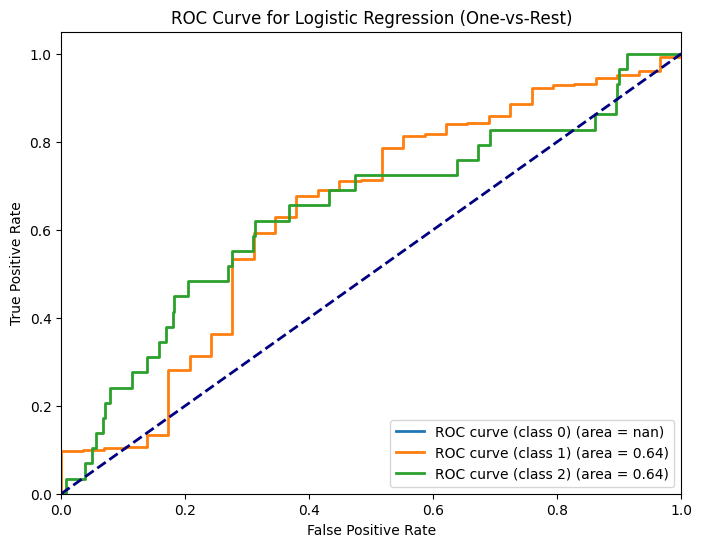

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Convert multiclass labels to binary labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Initialize the logistic regression model with OvR strategy
logistic_regression_ovr = OneVsRestClassifier(LogisticRegression(random_state=45000))

# Train the logistic regression model with OvR strategy
logistic_regression_ovr.fit(X_train, y_train)

# Predict probabilities for each class using OvR logistic regression
y_score_lr_ovr = logistic_regression_ovr.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_lr_ovr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine model
svm = SVC(random_state=45036)

# Train the SVM model
svm.fit(X_train, y_train)

# Predict on the testing set using SVM
y_pred_svm = svm.predict(X_test)

# Calculate the metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Update the results dictionary with SVM metrics
results['Support Vector Machine'] = {
    'Accuracy': accuracy_svm,
    'Precision': precision_svm,
    'Recall': recall_svm,
    'F1 Score': f1_svm
}

print(results)


{'Decision Tree': {'Accuracy': 0.94, 'Precision': 0.9437629657484878, 'Recall': 0.94, 'F1 Score': 0.9418735643663237}, 'KNN': {'Accuracy': 0.969, 'Precision': 0.9427845691382766, 'Recall': 0.969, 'F1 Score': 0.9557125444388014}, 'Logistic Regression': {'Accuracy': 0.971, 'Precision': 0.942841, 'Recall': 0.971, 'F1 Score': 0.9567133434804668}, 'Support Vector Machine': {'Accuracy': 0.971, 'Precision': 0.942841, 'Recall': 0.971, 'F1 Score': 0.9567133434804668}}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
